In [10]:
! pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 3.2 MB/s eta 0:00:0000:0100:01


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.special import gamma

In [11]:
def fx(y, a=2, b=4):
    if 0 <= y <= 1:
        beta_const = gamma(a) * gamma(b) / gamma(a + b)
        return (y ** (a - 1)) * ((1 - y) ** (b - 1)) / beta_const
    else:
        return 0

In [12]:
def fy(y):
    return 1 if 0 <= y <= 1 else 0

In [13]:
def aceitacao_rejeicao (fx, fy, gerar_y, c):
    cont = 1
    while True:
        y = gerar_y()
        u = np.random.uniform()
        teste = fx(y) / (c * fy(y))
        if u <= teste:
            return y, cont
        cont += 1

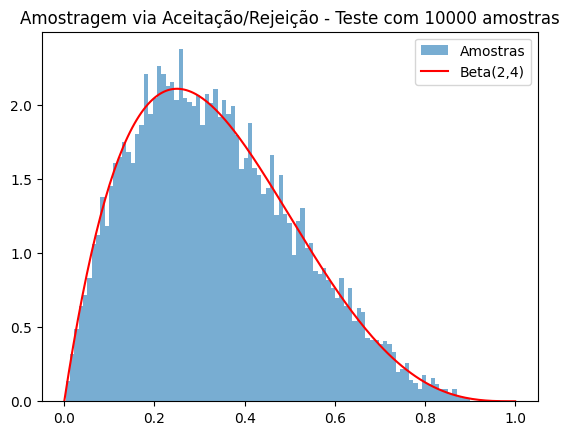

In [14]:
a = 2
b = 4
moda = (a - 1) / (a + b - 2)
c = fx(moda, a, b)  

fx_fixed = lambda y: fx(y, a, b)

qtd = 10000
amostras = [0] * qtd
contador = [0] * qtd
for i in range(qtd):
    amostras[i], contador[i] = aceitacao_rejeicao(fx_fixed, fy, np.random.uniform, c)


# (opcional) Mostrar histograma

plt.hist(amostras, bins=100, density=True, alpha=0.6, label='Amostras')
x = np.linspace(0, 1, 200)

plt.plot(x, beta.pdf(x, a, b), label='Beta(2,4)', color='red')
plt.legend()
plt.title(f"Amostragem via Aceitação/Rejeição - Teste com {qtd} amostras")
plt.show()

c = 2.1094 | Média de tentativas = 2.1028
c = 2.1516 | Média de tentativas = 2.1503
c = 2.1938 | Média de tentativas = 2.2046
c = 2.2359 | Média de tentativas = 2.2570
c = 2.2781 | Média de tentativas = 2.2681
c = 2.3203 | Média de tentativas = 2.2778
c = 2.3625 | Média de tentativas = 2.3386
c = 2.4047 | Média de tentativas = 2.4087
c = 2.4469 | Média de tentativas = 2.4747
c = 2.4891 | Média de tentativas = 2.4654
c = 2.5312 | Média de tentativas = 2.5081


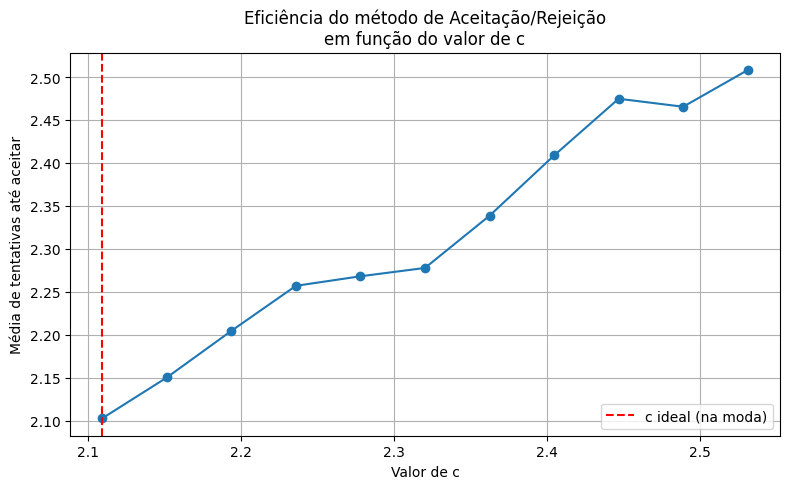

In [18]:

# Parâmetros da Beta
a = 2
b = 4
moda = (a - 1) / (a + b - 2)
c_moda = fx(moda, a, b)

# Valores de c ao redor da moda
c_values = np.linspace(c_moda, c_moda * 1.2, 11)


# Lista para médias, já com tamanho fixado
medias_tentativas = [0] * len(c_values)

# Loop principal
for idx_c, c in enumerate(c_values):
    tentativas = [0] * 10000  # Prealocando vetor de tentativas

    for i in range(10000):
        _, cont = aceitacao_rejeicao(fx, fy, np.random.uniform, c)
        tentativas[i] = cont

    medias_tentativas[idx_c] = np.mean(tentativas)
    print(f"c = {c:.4f} | Média de tentativas = {medias_tentativas[idx_c]:.4f}")

# Plot do resultado
plt.figure(figsize=(8, 5))
plt.plot(c_values, medias_tentativas, marker='o')
plt.axvline(c_moda, color='red', linestyle='--', label='c ideal (na moda)')
plt.xlabel('Valor de c')
plt.ylabel('Média de tentativas até aceitar')
plt.title('Eficiência do método de Aceitação/Rejeição\nem função do valor de c')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
